In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

1. RGB Channels

Image Shape: (512, 512, 3)
Image Size: 786432


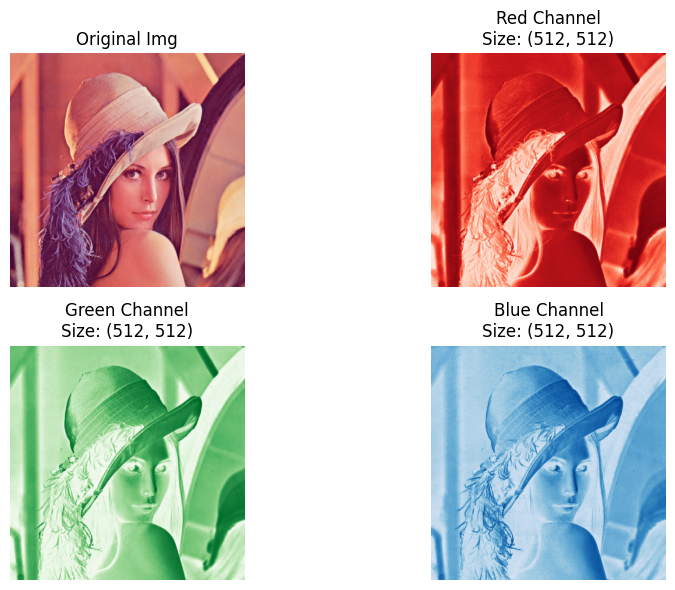

In [78]:
image_path = 'Lena_Image.png'

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]
blue_channel = img_rgb[:, :, 2]

print(f"Image Shape: {img_rgb.shape}")
print(f"Image Size: {img_rgb.size}")

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Original Img')
axes[0, 0].axis('off')

axes[0, 1].imshow(red_channel, cmap='Reds')
axes[0, 1].set_title(f'Red Channel\nSize: {red_channel.shape}')
axes[0, 1].axis('off')

axes[1, 0].imshow(green_channel, cmap='Greens')
axes[1, 0].set_title(f'Green Channel\nSize: {green_channel.shape}')
axes[1, 0].axis('off')

axes[1, 1].imshow(blue_channel, cmap='Blues')
axes[1, 1].set_title(f'Blue Channel\nSize: {blue_channel.shape}')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


2. Grey Scale

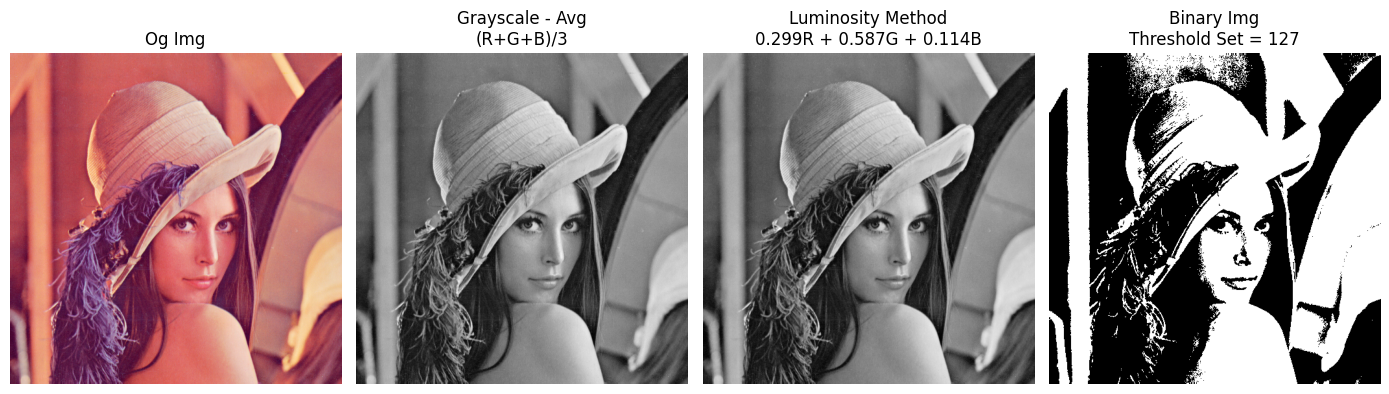

Avg Grayscale Shape: (512, 512)
Luminosity Grayscale Shape: (512, 512)
Binary Img Shape: (512, 512)


In [79]:
gray_average = np.mean(img_rgb, axis=2).astype(np.uint8)

#0.299*R + 0.587*G + 0.114*B
gray_luminosity = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_weighted = (0.299 * img_rgb[:, :, 0] +
                 0.587 * img_rgb[:, :, 1] +
                 0.114 * img_rgb[:, :, 2]).astype(np.uint8)

_, binary_image = cv2.threshold(gray_luminosity, 127, 255, cv2.THRESH_BINARY)
fig, axes = plt.subplots(1, 4, figsize=(14, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Og Img')
axes[0].axis('off')

axes[1].imshow(gray_average, cmap='gray')
axes[1].set_title('Grayscale - Avg\n(R+G+B)/3')
axes[1].axis('off')

axes[2].imshow(gray_luminosity, cmap='gray')
axes[2].set_title('Luminosity Method\n0.299R + 0.587G + 0.114B')
axes[2].axis('off')


axes[3].imshow(binary_image, cmap='gray')
axes[3].set_title('Binary Img\nThreshold Set = 127')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print(f"Avg Grayscale Shape: {gray_average.shape}")
print(f"Luminosity Grayscale Shape: {gray_luminosity.shape}")
print(f"Binary Img Shape: {binary_image.shape}")

3.1 Extract ROI

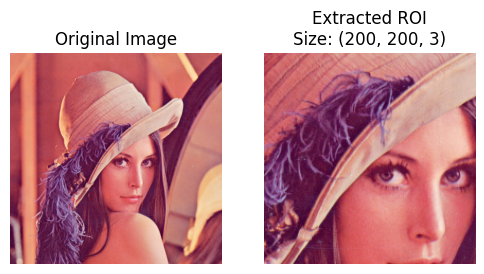

In [80]:
roi_size = roi.shape


#Manual Method (Cause colab doesn't have ui)
x, y, w, h = 150, 150, 200, 200
roi = img_rgb[y:y+h, x:x+w]

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(roi)
plt.title(f"Extracted ROI\nSize: {roi_size}")
plt.axis("off")

plt.show()


3.4 Masking n Brightness and Contrast

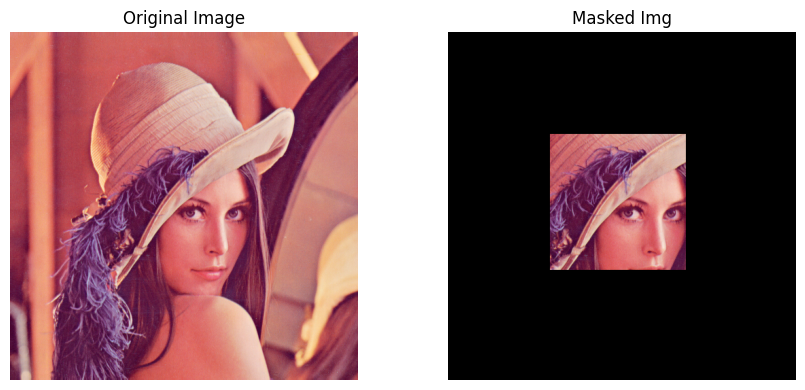

In [81]:
img = cv2.imread("Lena_Image.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Manual
x, y, w, h = 150, 150, 200, 200
roi = img_rgb[y:y+h, x:x+w]

roi_size = roi.shape

#Create mask
mask = np.zeros(img_rgb.shape[:2], dtype=np.uint8)
mask[y:y+h, x:x+w] = 255

masked_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(masked_img)
plt.title("Masked Img")
plt.axis("off")

plt.tight_layout()
plt.show()


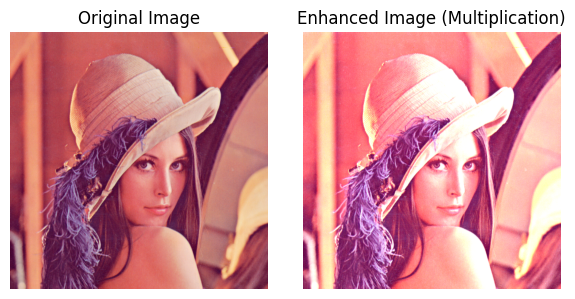

In [82]:
factor = 1.5
multiplied_img = np.clip(img_rgb * factor, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(multiplied_img)
plt.title("Enhanced Image (Multiplication)")
plt.axis("off")

plt.tight_layout()
plt.show()


3.2 Addition 50

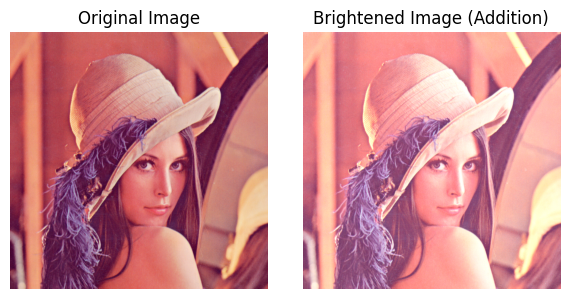

In [83]:
value = 50
bright_img = cv2.add(img_rgb, np.ones(img_rgb.shape, dtype=np.uint8) * value)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bright_img)
plt.title("Brightened Image (Addition)")
plt.axis("off")

plt.tight_layout()
plt.show()


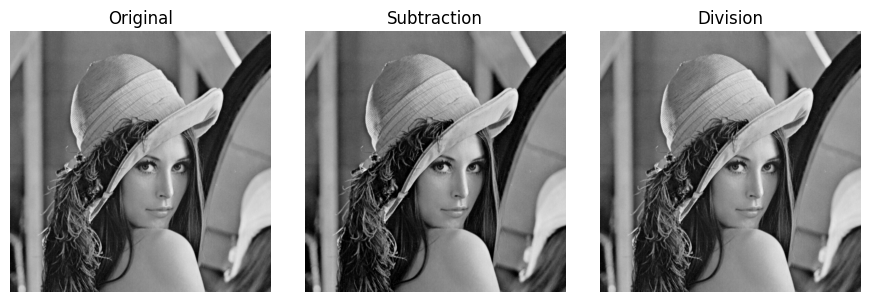

In [88]:
img = cv2.imread("Lena_Image.png", 0)
sub_img = cv2.subtract(img, 50)
#Grayscaled?

div_img = cv2.divide(img, 2)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sub_img, cmap='gray')
plt.title("Subtraction")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(div_img, cmap='gray')
plt.title("Division")
plt.axis("off")

plt.tight_layout()
plt.show()

3.3 Motion

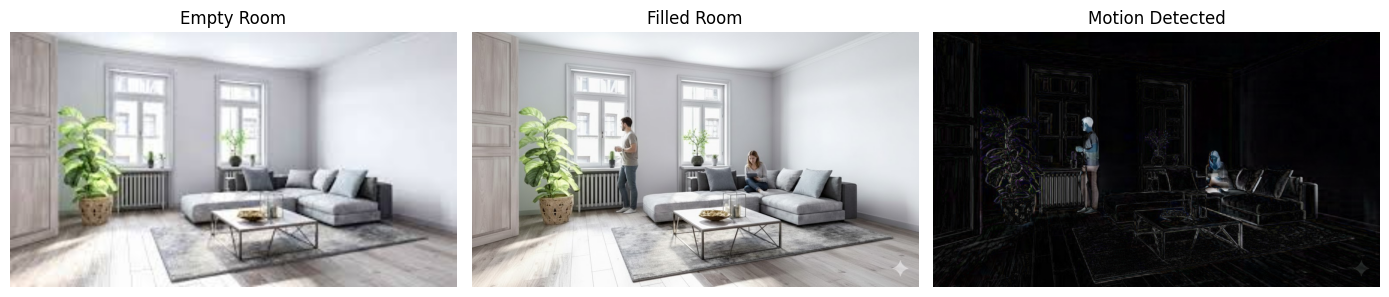

In [72]:
filled = cv2.imread("Filled_living_room.jpg")
empty = cv2.imread("Empty_living_room.jpg")

empty = cv2.resize(empty, (filled.shape[1], filled.shape[0]))

filled_rgb = cv2.cvtColor(filled, cv2.COLOR_BGR2RGB)
empty_rgb = cv2.cvtColor(empty, cv2.COLOR_BGR2RGB)

motion = cv2.absdiff(filled_rgb, empty_rgb)

plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.imshow(empty_rgb)
plt.title("Empty Room")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(filled_rgb)
plt.title("Filled Room")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(motion)
plt.title("Motion Detected")
plt.axis("off")

plt.tight_layout()
plt.show()


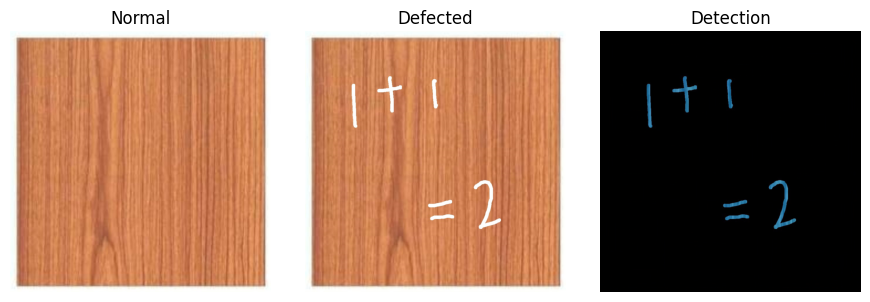

In [75]:
fine = cv2.imread("fine_plywood.jpg")
defect = cv2.imread("defected.jpg")


fine_rgb = cv2.cvtColor(fine, cv2.COLOR_BGR2RGB)
defect_rgb = cv2.cvtColor(defect, cv2.COLOR_BGR2RGB)

defect_diff = cv2.absdiff(defect_rgb, fine_rgb)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(fine_rgb)
plt.title("Normal")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(defect_rgb)
plt.title("Defected")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(defect_diff)
plt.title("Detection")
plt.axis("off")

plt.tight_layout()
plt.show()


3.6 Xor

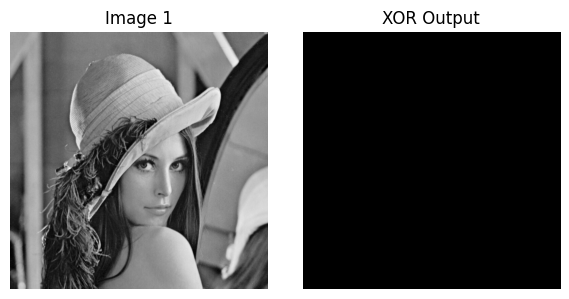

In [89]:
img1 = cv2.imread("Lena_Image.png", 0)
img2 = cv2.imread("Lena_Image.png", 0)

xor_img = cv2.bitwise_xor(img1, img2)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Image 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(xor_img, cmap='gray')
plt.title("XOR Output")
plt.axis("off")

plt.tight_layout()
plt.show()


4. Frames extract

In [113]:
video_path = 'Sample_Video.mp4'
cap = cv2.VideoCapture(video_path)

extracted_frames = []
target_frames = [5, 30, 75]

cap = cv2.VideoCapture(video_path)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count in target_frames:
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        extracted_frames.append((frame_count, rgb_frame))
        print(f"Extracted frame: {frame_count}")

    frame_count += 1
    if len(extracted_frames) == len(target_frames):
        break

cap.release()

Extracted frame: 5
Extracted frame: 30
Extracted frame: 75


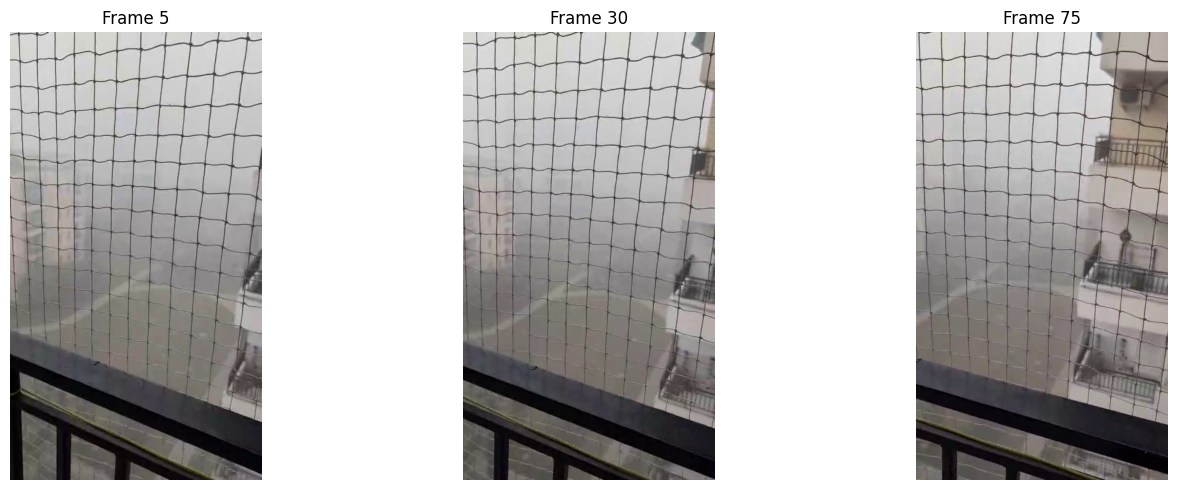

In [114]:
plt.figure(figsize=(15, 5))

for i, (frame_num, frame_data) in enumerate(extracted_frames):
    plt.subplot(1, len(extracted_frames), i + 1)
    plt.imshow(frame_data)
    plt.title(f"Frame {frame_num}")
    plt.axis('off')

plt.tight_layout()
plt.show()
